<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #87003aff, #3d001aff);
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Diabetes Prediction using SVM
    </h1>
</div>



<h4 style="color:#d2005bff">1. Importing Required Libraries for Building and Training Neural Networks with TensorFlow and Keras</h4>

In [5]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns

<h4 style="color:#d2005bff">2. Loading the Diabetes Dataset</h4>

In [6]:
diabetes=pd.read_csv("diabetes.csv")

<h4 style="color:#d2005bff">3. Statistical Summary of the Diabetes Dataset</h4>

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h4 style="color:#d2005bff">4. Dataset Information and Shape</h4>

In [8]:
print(diabetes.info())
print('---------------------------------------------------')
print(diabetes.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
---------------------------------------------------
(768, 9)


<h4 style="color:#d2005bff">5. Distribution of Diabetes Outcome</h4>

Outcome
0    500
1    268
Name: count, dtype: int64
---------------------------------------------------


<Axes: title={'center': 'Diabetes Outcome Distribution'}, xlabel='Outcome', ylabel='Count'>

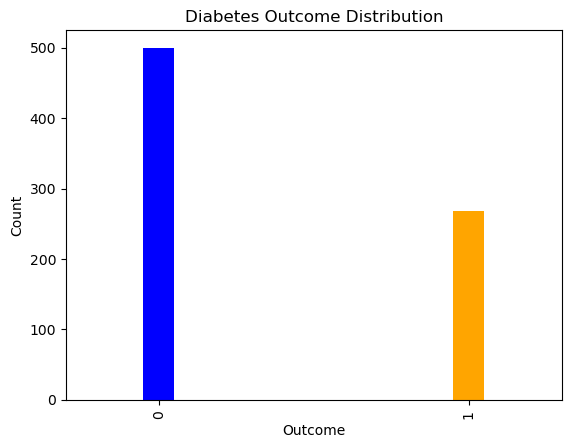

In [9]:
print(diabetes['Outcome'].value_counts())
print('---------------------------------------------------')
diabetes['Outcome'].value_counts().plot(kind='bar', color=['blue', 'orange'],width=0.1,xlabel='Outcome',ylabel='Count',title='Diabetes Outcome Distribution',xticks=[0, 1])

<h4 style="color:#d2005bff">6. Mean Values of Features Grouped by Outcome</h4>

In [10]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<h4 style="color:#d2005bff">7. Splitting Features and Target Variable</h4>

In [11]:
x=diabetes.drop(columns=['Outcome'],axis=1)
y=diabetes['Outcome']

<h4 style="color:#d2005bff">8. Feature Scaling and Train-Test Split</h4>

In [12]:
scaler=StandardScaler()
a=scaler.fit(x)
b=a.transform(x)
x=b
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2,stratify=y)

<h4 style="color:#d2005bff">9. Training the SVM Classifier with RBF Kernel</h4>

In [13]:
clasdifer=svm.SVC(kernel='rbf')
clasdifer.fit(x_train,y_train)
clasdifer

SVC()

<h4 style="color:#d2005bff">10. Evaluating Model Accuracy on Training Data</h4>

In [14]:
x_trainpredect=clasdifer.predict(x_train)
accurcyx_train=accuracy_score(x_trainpredect,y_train)
print(f"Accuracy Score of training data Is : {accurcyx_train:.2f}")

Accuracy Score of training data Is : 0.83


<h4 style="color:#d2005bff">11. Evaluating Model Accuracy on Test Data</h4>

In [15]:
x_testpredect=clasdifer.predict(x_test)
accurcyx_test=accuracy_score(x_testpredect,y_test)
print(f"Accuracy Score of training data Is : {accurcyx_test:.2f}")

Accuracy Score of training data Is : 0.73


<h4 style="color:#d2005bff">12. Defining a Function to Check Diabetes Prediction</h4>

In [16]:
def cleck(datapredict) :
    if datapredict == 0 :
        print("The human is Not diabetic")
    else :
        print("The human is diabetic")

<h4 style="color:#d2005bff">13. Making Predictions on New Data Samples</h4>

In [17]:
inputpredict1=(6,148,72,35,0,33.6,0.627,50)
inputpredict2=(1,85,66,29,0,26.6,0.351,31)
x1=np.asarray(inputpredict1).reshape(1,-1)
x2=np.asarray(inputpredict2).reshape(1,-1)
data1=scaler.transform(x1)
data2=scaler.transform(x2)
datapredict1=clasdifer.predict(data1)
datapredict2=clasdifer.predict(data2)
print(datapredict1)
print(datapredict2)
cleck(datapredict1)
cleck(datapredict2)

[1]
[0]
The human is diabetic
The human is Not diabetic


c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Rammah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<h4 style="color:#d2005bff">14. Confusion Matrix Visualization for Test Data</h4>

<Axes: >

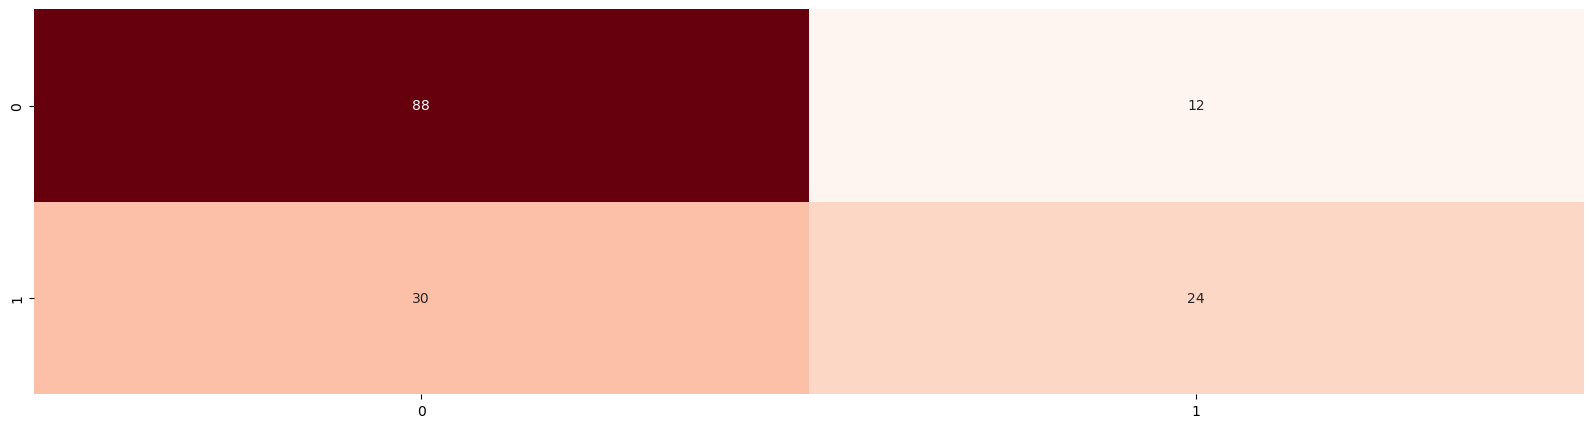

In [35]:
x_testpredect=clasdifer.predict(x_test)
confusionmatrixx=confusion_matrix(y_test,x_testpredect)
plt.figure(figsize=(20,5))
plt.xlabel="x"
plt.xlabel="y"
sns.heatmap(confusionmatrixx, annot=True, fmt="d", cmap="Reds", cbar=False)


<h4 style="color:#d2005bff">15. Bar Plot of Insulin Levels vs Outcome</h4>

C:\Users\Rammah\AppData\Local\Temp\ipykernel_23208\1770308472.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Insulin", y="Outcome", data=diabetes, ci=None,color="red")


<Axes: xlabel='Insulin', ylabel='Outcome'>

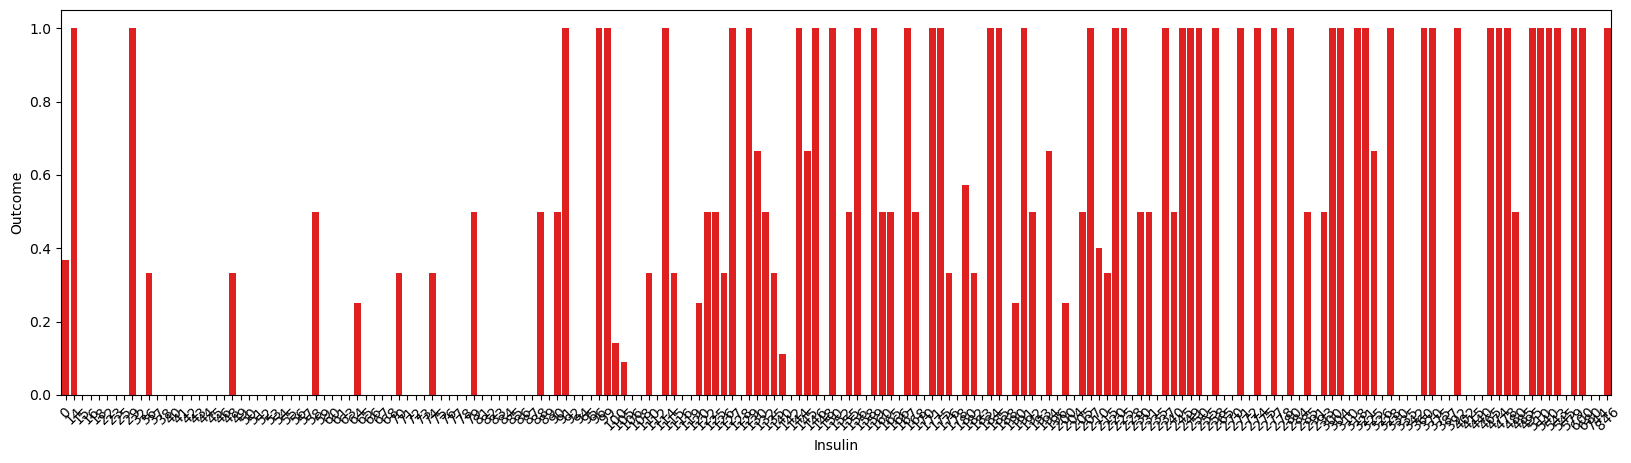

In [36]:
x_testpredect=clasdifer.predict(x_test)
plt.figure(figsize=(20,5))
plt.xlabel="x"
plt.xticks(rotation=45)
plt.xlabel="y"
sns.barplot(x="Insulin", y="Outcome", data=diabetes, ci=None,color="red")
